# Agrupamiento jerarquico

Librerias

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [26]:
data = pd.read_csv('wine.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [27]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [28]:
indices = [12, 58, 112]
muestras = pd.DataFrame(data.loc[indices], 
                       columns = data.keys()).reset_index(drop = True)

In [29]:
data = data.drop(['Customer_Segment'], axis = 1)
muestras = muestras.drop(['Customer_Segment'], axis = 1)

In [30]:
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)
X = data_escalada

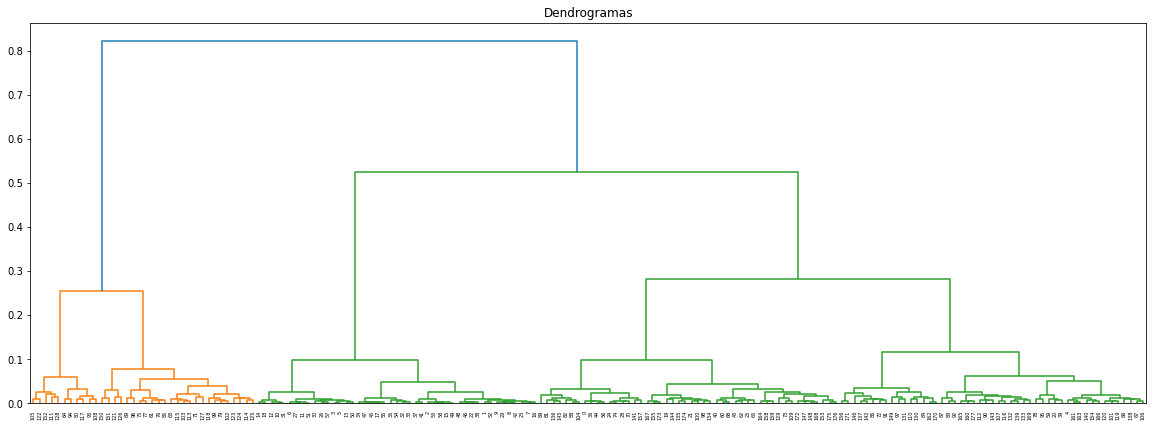

In [31]:

plt.figure(figsize=(20, 7))  
plt.title("Dendrogramas") 
dendrograma = shc.dendrogram(shc.linkage(X, method = 'ward'))

In [37]:
algoritmo = AgglomerativeClustering(n_clusters = 3, 
                                    affinity='euclidean', linkage='ward') 

In [38]:
algoritmo.fit(X)
pred1 = algoritmo.fit_predict(X)

In [39]:
muestra_prediccion = algoritmo.fit_predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print( "Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 2
Muestra 1 se encuentra en el clúster: 1
Muestra 2 se encuentra en el clúster: 0


Frente al denograma visto. Se ve un cluster de 3. Esto quiere decir que existen 3 grupos, si vemos dentro de las ramas del denograma. Vemos que 2 cluster poseen raices comunes, por lo tanto estos 2 grupos se relacionan mas que el grupo sin ramas en comun. Estas ramas pueden dar inicio a errores de predicciones dadas en estos 2 grupos